In [303]:
from matplotlib import pyplot as plt
import numpy as np

In [304]:
from sklearn.datasets import load_iris
data = load_iris()

features =  data.data
feature_names = data.feature_names
target = data.target
target_names = data.target_names

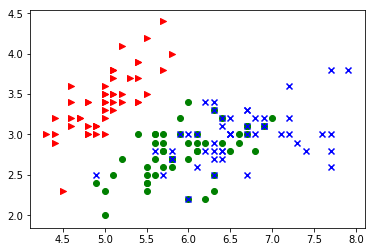

In [305]:
for t in range(3):
    if t == 0:
        c = 'r'
        marker = '>'
    elif t == 1:
        c = 'g'
        marker = 'o'
    elif t == 2:
        c = 'b'
        marker = 'x'
    plt.scatter(features[target == t,0],features[target == t,1],marker=marker,c=c)

In [306]:
labels = target_names[target]
plength = features[:,2]
is_setosa = (labels == 'setosa')
max_setosa = plength[is_setosa].max()
min_non_setosa = plength[~is_setosa].min()
print('Maximum of setosa: {0}.'.format(max_setosa))

Maximum of setosa: 1.9.


In [307]:
print('Minimum of  others: {0}.'.format(min_non_setosa))

Minimum of  others: 3.0.


In [308]:
best_acc = -1.0
features = features[~is_setosa]
labels = labels[~is_setosa]

is_virginica = (labels == 'virginica')
for fi in range(features.shape[1]):
    thresh = features[:,fi]
    for t in thresh:
        feature_i = features[:,fi]
        pred = (feature_i >t)
        acc = (pred == is_virginica).mean()
        rev_acc = (pred == ~is_virginica).mean()
        if rev_acc > acc:
            reverse = True
            acc = rev_acc
        else:
            reverse = False
        if acc > best_acc:
            best_acc = acc
            best_fi = fi
            best_t = t
            best_reverse = reverse


In [309]:
def fit_model(features, labels):

    best_acc = -1.0
    # Loop over all the features:
    
    for fi in range(features.shape[1]):
        thresh = features[:, fi].copy()
        # test all feature values in order:
        thresh.sort()
        
        for t in thresh:
            pred = (features[:, fi] > t)
            # Measure the accuracy of this 
            acc = (pred == labels).mean()
            rev_acc = (pred == ~labels).mean()
            
            if rev_acc > acc:
                acc = rev_acc
                reverse = True
            else:
                reverse = False
            if acc > best_acc:
                best_acc = acc
                best_fi = fi
                best_t = t
                best_reverse = reverse
                
    return best_t, best_fi, best_reverse

In [310]:
def is_virginica_test(fi, t, reverse, example):
    test = example[fi] > t
    if reverse:
        test = not test
    return test

In [311]:

def predict(model, features):

    # A model is a pair as returned by fit_model
    t, fi, reverse = model
    if reverse:
        return features[:, fi] <= t
    else:
        return features[:, fi] > t

In [312]:

correct = 0.0
for ei in range(len(features)):
    training = np.ones(len(features), bool)
    training[ei] = False
    testing = ~training
    model = fit_model(features[training], is_virginica[training])
    predictions = predict(model, features[testing])
    correct += np.sum(predictions == is_virginica[testing])
   
acc = correct/float(len(features))
print('Accuracy: {0:.1%}'.format(acc))

Accuracy: 87.0%


In [313]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
from sklearn.cross_validation import KFold

kf = KFold(len(features), n_folds=5, shuffle=True)
means = []
for training,testing in kf:

    classifier.fit(features[training], labels[training])
    prediction = classifier.predict(features[testing])

    curmean = np.mean(prediction == labels[testing])
    means.append(curmean)
print("Mean accuracy: {:.1%}".format(np.mean(means)))

Mean accuracy: 94.0%


In [314]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

classifier = KNeighborsClassifier(n_neighbors=1)
classifier = Pipeline([('norm', StandardScaler()),('knn', classifier)])